In [10]:
!pip install webdriver-manager


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import time

# 设置Chrome浏览器驱动
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# 访问猫眼网站
driver.get("https://piaofang.maoyan.com/rankings/year?year=2024")
driver.implicitly_wait(20)
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(5)

# 获取页面源码
soup = BeautifulSoup(driver.page_source, "html.parser")

# 查找电影数据
movies = soup.select("ul.row[data-loaded='true']")
print(f"找到的电影行数: {len(movies)}")

for movie in movies[:5]:
    href = movie.get("data-com", "").split("href:'")[1].split("'")[0] if "href:" in movie.get("data-com", "") else "N/A"
    movie_id = href.split("/movie/")[1] if "/movie/" in href else "N/A"
    rank = movie.select_one("li.col0").text if movie.select_one("li.col0") else "N/A"
    box_office = movie.select_one("li.col2").text if movie.select_one("li.col2") else "N/A"
    title = movie.select_one("li.col1").text if movie.select_one("li.col1") else "N/A"  # 尝试抓取名称
    print(f"排名: {rank}, 电影ID: {movie_id}, 票房: {box_office}, 名称: {title}")

# 关闭浏览器
driver.quit()

找到的电影行数: 293
排名: 1, 电影ID: 1478901, 票房: 341720, 名称: 
热辣滚烫
2024-02-10 上映

排名: 2, 电影ID: 1495728, 票房: 336084, 名称: 
飞驰人生2
2024-02-10 上映

排名: 3, 电影ID: 1516983, 票房: 332747, 名称: 
抓娃娃
2024-07-16 上映

排名: 4, 电影ID: 1489349, 票房: 242909, 名称: 
第二十条
2024-02-10 上映

排名: 5, 电影ID: 1500234, 票房: 198383, 名称: 
熊出没·逆转时空
2024-02-10 上映



In [36]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import time
import pandas as pd
import re

# 设置Chrome浏览器驱动
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# 访问猫眼网站
driver.get("https://piaofang.maoyan.com/rankings/year?year=2024")
driver.implicitly_wait(20)
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(5)

# 获取页面源码
soup = BeautifulSoup(driver.page_source, "html.parser")

# 查找电影数据
movies = soup.select("ul.row[data-loaded='true']")
print(f"找到的电影行数: {len(movies)}")

# 存储数据的列表
data = []

for movie in movies:
    href = movie.get("data-com", "").split("href:'")[1].split("'")[0] if "href:" in movie.get("data-com", "") else "N/A"
    movie_id = href.split("/movie/")[1] if "/movie/" in href else "N/A"
    rank = movie.select_one("li.col0").text.strip() if movie.select_one("li.col0") else "N/A"
    box_office = movie.select_one("li.col2").text.strip() if movie.select_one("li.col2") else "N/A"
    
    # 提取名称和上映日期
    title_raw = movie.select_one("li.col1").text.strip() if movie.select_one("li.col1") else "N/A"
    match = re.match(r"^(.*?)\n(\d{4}-\d{2}-\d{2}) 上映$", title_raw, re.MULTILINE)
    if match:
        title = match.group(1).strip()
        release_date = match.group(2)
    else:
        title = title_raw
        release_date = "N/A"
    
    # **提取平均票价和场均人次**
    avg_ticket_price = movie.select_one("li.col3.tr").text.strip() if movie.select_one("li.col3.tr") else "N/A"
    avg_audience_per_show = movie.select_one("li.col4.tr").text.strip() if movie.select_one("li.col4.tr") else "N/A"

    # 添加到数据列表
    data.append({
        "电影ID": movie_id,
        "电影名称": title,
        "排名": rank,
        "票房（万元）": box_office,
        "上映日期": release_date,
        "平均票价（元）": avg_ticket_price,
        "场均人次": avg_audience_per_show
    })

# 打印前5条数据
for item in data[:5]:
    print(item)

# 保存为CSV
df = pd.DataFrame(data)
df.to_csv("movie_2024.csv", index=False, encoding="utf-8-sig")
print("数据已保存为 movie_2024.csv")

# 关闭浏览器
driver.quit()


找到的电影行数: 293
{'电影ID': '1478901', '电影名称': '热辣滚烫', '排名': '1', '票房（万元）': '341720', '上映日期': '2024-02-10', '平均票价（元）': '48.017963', '场均人次': '22'}
{'电影ID': '1495728', '电影名称': '飞驰人生2', '排名': '2', '票房（万元）': '336084', '上映日期': '2024-02-10', '平均票价（元）': '48.021935', '场均人次': '19'}
{'电影ID': '1516983', '电影名称': '抓娃娃', '排名': '3', '票房（万元）': '332747', '上映日期': '2024-07-16', '平均票价（元）': '41.382725', '场均人次': '14'}
{'电影ID': '1489349', '电影名称': '第二十条', '排名': '4', '票房（万元）': '242909', '上映日期': '2024-02-10', '平均票价（元）': '46.312737', '场均人次': '16'}
{'电影ID': '1500234', '电影名称': '熊出没·逆转时空', '排名': '5', '票房（万元）': '198383', '上映日期': '2024-02-10', '平均票价（元）': '45.990677', '场均人次': '22'}
数据已保存为 movie_2024.csv


In [41]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import time
import pandas as pd
import re

# 读取最新的电影排行榜数据
df = pd.read_csv("movie_2024.csv")
data = df.to_dict("records")

# 设置Chrome浏览器驱动
options = webdriver.ChromeOptions()
options.add_argument("User-Agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/133.0.0.0 Safari/537.36")
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

# 遍历所有电影，而不是仅处理前 35 部
for item in data:  
    movie_id = item["电影ID"]
    detail_url = f"https://piaofang.maoyan.com/movie/{movie_id}"

    # **重试机制**
    max_retries = 3
    for attempt in range(max_retries):
        try:
            driver.get(detail_url)
            time.sleep(3)  # 避免访问过快导致封禁
            
            detail_soup = BeautifulSoup(driver.page_source, "html.parser")
            print(f"访问 {detail_url}，标题: {driver.title}")
            
            # 抓取并清洗题材
            genre_raw = detail_soup.select_one(".info-category").text.strip() if detail_soup.select_one(".info-category") else "N/A"
            # **去除 3D / IMAX 信息**
            genre_cleaned = re.sub(r"\b(2D|3D|IMAX|2DIMAX|3DIMAX|4D|DTSX)\b", "", genre_raw)
            # **清理换行符、多余空格，并确保格式正确**
            genre_list = [g.strip() for g in genre_cleaned.replace("\n", ",").split(",") if g.strip()]
            # **用逗号连接成最终格式**
            genre = ", ".join(genre_list) if genre_list else "N/A"

            # **提取电影格式（3D/IMAX）**
            format_tag = detail_soup.select_one(".info-tag").text.strip() if detail_soup.select_one(".info-tag") else "N/A"

            # **提取地区和时长（从 .info-source-duration 解析）**
            duration_region_raw = detail_soup.select_one(".info-source-duration p").text.strip() if detail_soup.select_one(".info-source-duration p") else "N/A"
            
            # **使用正则提取地区（匹配“中文”部分）**
            region_match = re.search(r"([\u4e00-\u9fa5]+)", duration_region_raw) if "N/A" not in duration_region_raw else None
            region = region_match.group(1) if region_match else "N/A"
            
            # **使用正则提取时长（保留“分钟”）**
            duration_match = re.search(r"(\d+)分钟", duration_region_raw) if "N/A" not in duration_region_raw else None
            duration = duration_match.group(1) + "分钟" if duration_match else "N/A"

            # **提取观众评分人数**
            score_count_raw = detail_soup.select_one(".detail-score-count").text.strip() if detail_soup.select_one(".detail-score-count") else "N/A"
            score_count_match = re.search(r"(\d+\.?\d*)万?", score_count_raw) if "N/A" not in score_count_raw else None
            score_count = float(score_count_match.group(1)) if score_count_match else 0  # 单位换算成万

            # **提取想看人数**
            wish_count_raw = detail_soup.select_one(".detail-wish-count").text.strip() if detail_soup.select_one(".detail-wish-count") else "N/A"
            wish_count_match = re.search(r"(\d+\.?\d*)万?", wish_count_raw) if "N/A" not in wish_count_raw else None
            wish_count = float(wish_count_match.group(1)) if wish_count_match else 0  # 单位换算成万

            # **提取评分**
            score = detail_soup.select_one(".score-detail .rating-num").text.strip() if detail_soup.select_one(".score-detail .rating-num") else "N/A"

            # **更新数据**
            item["题材"] = genre
            item["格式"] = format_tag  # **原 "3D/IMAX" 改成 "格式"**
            item["时长"] = duration
            item["地区"] = region
            item["评分"] = score
            item["观众评分人数（万）"] = score_count
            item["想看人数（万）"] = wish_count
            break  # **成功爬取后退出重试循环**
        
        except Exception as e:
            print(f"尝试 {attempt + 1} 失败: {e}")
            if attempt < max_retries - 1:
                time.sleep(2 ** attempt)  # **指数退避策略，防止封IP**
            else:
                # **如果所有尝试都失败，则填充 "N/A"**
                item["题材"] = "N/A"
                item["格式"] = "N/A"
                item["时长"] = "N/A"
                item["地区"] = "N/A"
                item["评分"] = "N/A"
                item["观众评分人数（万）"] = "N/A"
                item["想看人数（万）"] = "N/A"

    print(item)

# **保存更新后的数据**
updated_df = pd.DataFrame(data)
updated_df.to_csv("movie_rankings_2024.csv", index=False, encoding="utf-8-sig")
print(" 数据已保存为 movie_rankings_2024.csv")

# **关闭浏览器**
driver.quit()


访问 https://piaofang.maoyan.com/movie/1478901，标题: 热辣滚烫
{'电影ID': 1478901, '电影名称': '热辣滚烫', '排名': 1, '票房（万元）': 341720, '上映日期': '2024-02-10', '平均票价（元）': 48.017963, '场均人次': 22, '题材': '喜剧, 剧情', '格式': '2DIMAX', '时长': '129分钟', '地区': '中国大陆', '评分': '9.2', '观众评分人数（万）': 48.0, '想看人数（万）': 58.8}
访问 https://piaofang.maoyan.com/movie/1495728，标题: 飞驰人生2
{'电影ID': 1495728, '电影名称': '飞驰人生2', '排名': 2, '票房（万元）': 336084, '上映日期': '2024-02-10', '平均票价（元）': 48.021935, '场均人次': 19, '题材': '喜剧, 剧情', '格式': '2DIMAX', '时长': '121分钟', '地区': '中国大陆', '评分': '9.5', '观众评分人数（万）': 56.0, '想看人数（万）': 79.7}
访问 https://piaofang.maoyan.com/movie/1516983，标题: 抓娃娃
{'电影ID': 1516983, '电影名称': '抓娃娃', '排名': 3, '票房（万元）': 332747, '上映日期': '2024-07-16', '平均票价（元）': 41.382725, '场均人次': 14, '题材': '喜剧, 剧情', '格式': '2DIMAX', '时长': '133分钟', '地区': '中国大陆', '评分': '9.4', '观众评分人数（万）': 35.0, '想看人数（万）': 36.8}
访问 https://piaofang.maoyan.com/movie/1489349，标题: 第二十条
{'电影ID': 1489349, '电影名称': '第二十条', '排名': 4, '票房（万元）': 242909, '上映日期': '2024-02-10', '平均票价（元）': 46.312737

In [42]:
import pandas as pd

# 读取爬取并保存的电影数据
movie_rankings_csv = pd.read_csv("movie_rankings_2024.csv")

# 查看数据结构
print(movie_rankings_csv.info())  # 显示数据类型和缺失值
print(movie_rankings_csv.head())  # 显示前几行数据


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   电影ID       293 non-null    int64  
 1   电影名称       293 non-null    object 
 2   排名         293 non-null    int64  
 3   票房（万元）     293 non-null    int64  
 4   上映日期       293 non-null    object 
 5   平均票价（元）    293 non-null    float64
 6   场均人次       293 non-null    int64  
 7   题材         292 non-null    object 
 8   格式         85 non-null     object 
 9   时长         292 non-null    object 
 10  地区         292 non-null    object 
 11  评分         204 non-null    float64
 12  观众评分人数（万）  293 non-null    float64
 13  想看人数（万）    293 non-null    float64
dtypes: float64(4), int64(4), object(6)
memory usage: 32.2+ KB
None
      电影ID      电影名称  排名  票房（万元）        上映日期    平均票价（元）  场均人次          题材  \
0  1478901      热辣滚烫   1  341720  2024-02-10  48.017963    22      喜剧, 剧情   
1  1495728     飞驰人生2   2  336084 

In [45]:
import pandas as pd

# 读取数据
movie_rankings_csv = pd.read_csv("movie_rankings_2024.csv")

# 1. 处理 "时长" 列，提取数字并转换为整数
movie_rankings_csv["时长"] = movie_rankings_csv["时长"].str.extract(r"(\d+)")  # 提取数字
movie_rankings_csv["时长"] = pd.to_numeric(movie_rankings_csv["时长"], errors='coerce')  # 转换为数值
movie_rankings_csv["时长"] = movie_rankings_csv["时长"].fillna(pd.NA).astype("Int64")  # 缺失值填充 NaN

# 2. 转换 "上映日期" 为日期格式
movie_rankings_csv["上映日期"] = pd.to_datetime(movie_rankings_csv["上映日期"], errors="coerce")

# 3. 处理缺失值
movie_rankings_csv["题材"].fillna("未知", inplace=True)
movie_rankings_csv["格式"].fillna("未知", inplace=True)
movie_rankings_csv["地区"].fillna("未知", inplace=True)

# 4. 确保 "题材" 是字符串格式
movie_rankings_csv["题材"] = movie_rankings_csv["题材"].apply(lambda x: ", ".join(x) if isinstance(x, list) else str(x))

# 5. 去重
movie_rankings_csv.drop_duplicates(inplace=True)

# 6. 检查清理后的数据
print(movie_rankings_csv.info())  # 再次检查数据类型
print(movie_rankings_csv.head())  # 显示前几行数据

# 7. 保存清理后的数据
movie_rankings_csv.to_csv("cleaned_movie_rankings_2024.csv", index=False, encoding="utf-8-sig")

print("数据清理完成，已保存为 cleaned_movie_rankings_2024.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   电影ID       293 non-null    int64         
 1   电影名称       293 non-null    object        
 2   排名         293 non-null    int64         
 3   票房（万元）     293 non-null    int64         
 4   上映日期       293 non-null    datetime64[ns]
 5   平均票价（元）    293 non-null    float64       
 6   场均人次       293 non-null    int64         
 7   题材         293 non-null    object        
 8   格式         293 non-null    object        
 9   时长         292 non-null    Int64         
 10  地区         293 non-null    object        
 11  评分         204 non-null    float64       
 12  观众评分人数（万）  293 non-null    float64       
 13  想看人数（万）    293 non-null    float64       
dtypes: Int64(1), datetime64[ns](1), float64(4), int64(4), object(4)
memory usage: 32.5+ KB
None
      电影ID      电影名称  排名  票房（万元）       上映日期   

In [78]:
import pandas as pd

# 读取CSV文件
file_path = 'Province_Rank.csv'  # 替换为实际文件路径
df = pd.read_csv(file_path)
# 查看数据的前几行，了解其结构
df.head()
# 查看数据的基本信息，包括列名、数据类型、缺失值情况等
df.info()
# 查看数值列的统计信息，如票房、场次、人次等
df.describe()
# 查看所有列名，确认是否有拼写错误或不一致的地方
df.columns
# 检查数据中是否有缺失值
df.isnull().sum()
# 检查是否有重复的行
df.duplicated().sum()
# 查看数值列的最小、最大、均值等，检查是否有异常值
df[['票房（万元）', '场次', '人次']].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   统计时间         372 non-null    object 
 1   省区市          372 non-null    object 
 2   票房（万元）       372 non-null    int64  
 3   场次           372 non-null    int64  
 4   人次           372 non-null    int64  
 5   Unnamed: 5   0 non-null      float64
 6   Unnamed: 6   0 non-null      float64
 7   Unnamed: 7   0 non-null      float64
 8   Unnamed: 8   0 non-null      float64
 9   Unnamed: 9   0 non-null      float64
 10  Unnamed: 10  0 non-null      float64
dtypes: float64(6), int64(3), object(2)
memory usage: 32.1+ KB


,票房（万元）,场次,人次
count,372.000000,3.720000e+02,3.720000e+02
mean,11450.201613,2.505358e+05,2.718891e+06
std,13906.083650,2.105177e+05,3.070864e+06
min,297.000000,1.211400e+04,6.736900e+04
25%,3407.500000,1.043688e+05,8.250305e+05
50%,6950.500000,2.064520e+05,1.751961e+06
75%,13915.750000,3.079675e+05,3.261216e+06
max,102412.000000,1.191460e+06,2.179590e+07


In [79]:
# 清洗数据部分
import pandas as pd

# 读取数据
df = pd.read_csv('Province_Rank.csv')

# 删除不必要的列（Unnamed 列）
df.drop(columns=[col for col in df.columns if 'Unnamed' in col], inplace=True)

# 转换数据类型：确保“票房（万元）”，“场次”和“人次”列为数值型
df['票房（万元）'] = pd.to_numeric(df['票房（万元）'], errors='coerce')
df['场次'] = pd.to_numeric(df['场次'], errors='coerce')
df['人次'] = pd.to_numeric(df['人次'], errors='coerce')

# 处理缺失值：删除缺失票房、场次和人次的行
df.dropna(subset=['票房（万元）', '场次', '人次'], inplace=True)

# 处理重复数据：删除重复行
df.drop_duplicates(inplace=True)

# 检查异常值：删除负值的票房、场次和人次数据
df = df[(df['票房（万元）'] >= 0) & (df['场次'] >= 0) & (df['人次'] >= 0)]

# 转换“统计时间”列为日期格式，保留到月份
df['统计时间'] = pd.to_datetime(df['统计时间'], format='%Y年%m月').dt.to_period('M')

# 展示清洗后的数据
df.head()


,统计时间,省区市,票房（万元）,场次,人次
0,2024-01,广东,36075,907945,8868358
1,2024-01,江苏,21962,659280,5753555
2,2024-01,浙江,17518,497388,4313925
3,2024-01,北京,16359,257679,3208035
4,2024-01,上海,14775,259887,2966110


In [80]:
# 保存清洗后的数据到新的CSV文件
df.to_csv('cleaned_Province_Rank.csv', index=False, encoding="utf-8-sig")

In [71]:
import pandas as pd

# 读取CSV文件
file_path = 'top15_movies.csv'  # 替换为实际文件路径
df = pd.read_csv(file_path)

# 查看数据的前几行，了解其结构
df.head()
# 查看数据的基本信息，包括列名、数据类型、缺失值情况等
df.info()
# 查看数值列的统计信息，如票房、场次、人次等
df.describe()
# 查看所有列名，确认是否有拼写错误或不一致的地方
df.columns
# 检查数据中是否有缺失值
df.isnull().sum()
# 检查是否有重复的行
df.duplicated().sum()
# 查看数值列的最小、最大、均值等，检查是否有异常值
# 查看数值列的最小、最大、均值等，检查是否有异常值
df[['票房（万元）', '人次', '累计票房']].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   统计时间    180 non-null    object 
 1   影片名称    180 non-null    object 
 2   票房（万元）  180 non-null    float64
 3   人次      180 non-null    int64  
 4   累计票房    180 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 7.2+ KB


,票房（万元）,人次
count,180.000000,1.800000e+02
mean,22421.688167,5.301477e+06
std,45388.730745,9.929625e+06
min,846.060000,1.442580e+05
25%,4402.750000,1.040768e+06
50%,9177.620000,2.222405e+06
75%,19888.827500,4.963291e+06
max,332855.000000,6.890154e+07


In [72]:
import pandas as pd

# 读取数据
file_path = 'top15_movies.csv'  # 替换为实际文件路径
df = pd.read_csv(file_path)

# 清洗“累计票房”列：去掉单位并转换为数值型
def clean_cumulative_ticket(value):
    if isinstance(value, str):
        # 去除 "亿元" 或 "万元" 单位
        if '亿元' in value:
            return float(value.replace('亿元', '').strip()) * 10000  # 转换为万元
        if '万元' in value:
            return float(value.replace('万元', '').strip())  # 直接转换为万元
    return value

df['累计票房'] = df['累计票房'].apply(clean_cumulative_ticket)

# 转换“统计时间”列为日期格式，保留到月份
df['统计时间'] = pd.to_datetime(df['统计时间'], format='%Y年%m月').dt.to_period('M')

# 修改“累计票房”列标题
df.rename(columns={'累计票房': '累计票房（万元）'}, inplace=True)

# 去掉票房（万元）和累计票房（万元）的小数点，转换为整数
df['票房（万元）'] = df['票房（万元）'].astype(int)
df['累计票房（万元）'] = df['累计票房（万元）'].astype(int)

# 查看清洗后的数据
df.head()


,统计时间,影片名称,票房（万元）,人次,累计票房（万元）
0,2024-01,年会不能停！,91048,23172818,114200
1,2024-01,金手指,36427,9032235,52100
2,2024-01,潜行,19129,4928772,37800
3,2024-01,临时劫案,18396,4813816,18400
4,2024-01,一闪一闪亮星星,14386,3721553,69600


In [76]:
# 保存清洗后的数据到新的CSV文件
df.to_csv("cleaned_top15_movies.csv", index=False, encoding="utf-8-sig")

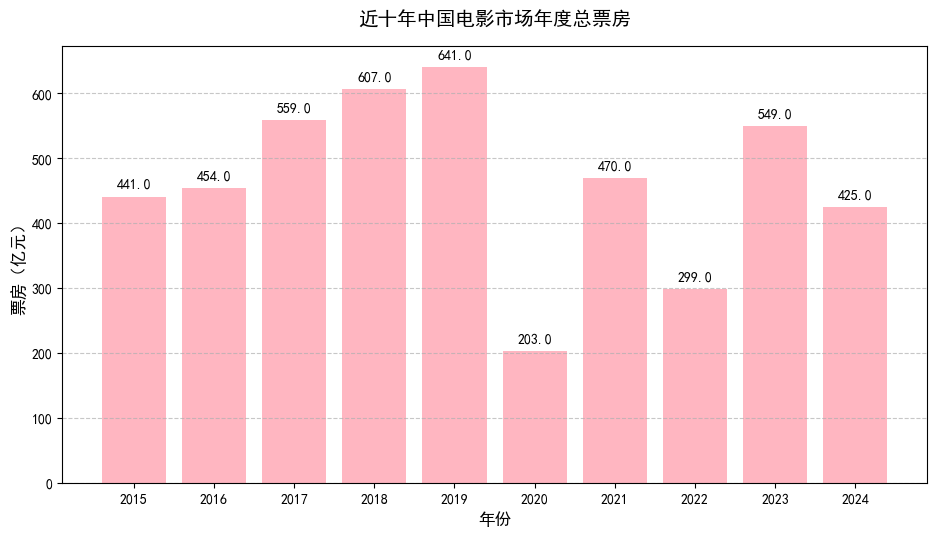

爬取结果：
2015年: 441.0亿元
2016年: 454.0亿元
2017年: 559.0亿元
2018年: 607.0亿元
2019年: 641.0亿元
2020年: 203.0亿元
2021年: 470.0亿元
2022年: 299.0亿元
2023年: 549.0亿元
2024年: 425.0亿元


In [3]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import time

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 用户代理，模拟浏览器访问
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# 存储数据的列表
years = []
box_offices = []

# 爬取 2015-2024 年的数据
for year in range(2015, 2025):
    url = f"https://piaofang.maoyan.com/rankings/year?year={year}"
    try:
        response = requests.get(url, headers=headers)
        response.raise_for_status()  # 检查请求是否成功
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # 假设年份和票房在类似提供的 HTML 结构中
        year_box = soup.find('span', id='year-box')
        update_time = soup.find('span', id='update-time')
        
        if year_box and update_time:
            year_text = year_box.text.strip().replace('年票房排行榜', '')
            box_office_text = update_time.text.strip('()').replace('总票房', '').replace('亿元', '')
            years.append(int(year_text))
            box_offices.append(float(box_office_text))
        else:
            print(f"未找到 {year} 年的数据，跳过")
            years.append(year)
            box_offices.append(0.0)
        
        time.sleep(2)  # 延时 2 秒，避免被封禁
    except Exception as e:
        print(f"爬取 {year} 年数据失败: {e}")
        years.append(year)
        box_offices.append(0.0)

# 绘制柱状图
plt.figure(figsize=(10, 6))
plt.bar(years, box_offices, color='lightpink')  
plt.xlabel('年份', fontsize=12)
plt.ylabel('票房（亿元）', fontsize=12)
plt.title('近十年中国电影市场年度总票房', fontsize=14, pad=15)
plt.xticks(years)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(box_offices):
    plt.text(years[i], v + 10, f'{v}', ha='center', va='bottom')

plt.tight_layout(pad=3.0)
plt.show()

# 输出爬取结果
print("爬取结果：")
for year, box_office in zip(years, box_offices):
    print(f"{year}年: {box_office}亿元")